In [11]:
# Import libraries
from src.generate_data import generate_poly_data
import matplotlib.pyplot as plt

In [22]:
%%capture
# Generate data
coeffs = [2, 3]
n_points = 1000
percentage_error = 2 
data = generate_poly_data(coeffs, n_points, percentage_error)

<AxesSubplot:xlabel='x', ylabel='y'>

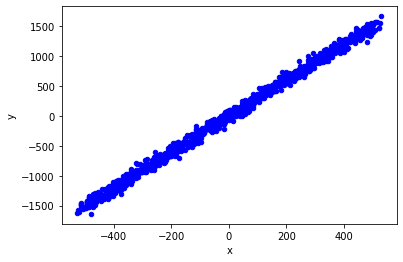

In [23]:
# plot data
data.plot(kind='scatter', x='x', y='y', color='blue')